# Análise de Vendas de Videogames - Projeto Ice
## Sprint 6

## Descrição do Projeto

Neste projeto, trabalhamos com um conjunto de dados relacionados a vendas de videogames da loja online **Ice**, que vende videogames. O objetivo é identificar padrões que determinam o sucesso de um jogo e assim poder planejar campanhas publicitárias para 2017.

A partir de um dataset que contém informações sobre **classificação ESRB**, **gêneros**, **plataformas**, **vendas regionais** (Norte América, Europa e Japão) e **pontuação de críticos e usuários**, buscamos entender os fatores que influenciam o desempenho de vendas de um jogo.

## Etapa 1: Exploração dos Dados

Na primeira etapa, carregamos e exploramos o conjunto de dados para entender as informações fornecidas. As colunas incluem:

- `name`: nome do jogo
- `platform`: plataforma de lançamento (PlayStation, Xbox, etc.)
- `year_of_release`: ano de lançamento
- `genre`: gênero do jogo
- `na_sales`: vendas na América do Norte (em milhões de USD)
- `eu_sales`: vendas na Europa (em milhões de USD)
- `jp_sales`: vendas no Japão (em milhões de USD)
- `other_sales`: vendas em outros países (em milhões de USD)
- `critic_score`: pontuação dos críticos (máximo de 100)
- `user_score`: pontuação dos usuários (máximo de 10)
- `esrb_rating`: classificação ESRB do jogo (Ex: "Teen", "Mature")



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/datasets/games.csv')
print(df.head())

#informações gerais
print(df.info())


                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 

## Etapa 2: Preparação dos Dados

Na etapa de preparação dos dados, fizemos os seguintes ajustes:

- Renomeamos as colunas para minúsculas para facilitar a manipulação dos dados.
- Convertimos os dados para os tipos apropriados.
- Tratamos valores ausentes e decidimos como lidar com valores como "TBD" (to be determined).
- Calculamos as vendas totais por jogo, somando as vendas nas diferentes regiões (`na_sales`, `eu_sales`, `jp_sales`, `other_sales`).

In [2]:
# 1. Renomeando colunas
df.columns = df.columns.str.lower()

# 2. Conversão de tipos
df['year_of_release'] = df['year_of_release'].astype('Int64')
df['critic_score'] = pd.to_numeric(df['critic_score'], errors='coerce')
df['user_score'] = df['user_score'].replace('tbd', pd.NA)
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

# 3. Preenchendo year_of_release
platform_year_means = df.groupby('platform')['year_of_release'].mean().astype('Int64')

def fill_year(row):
    if pd.isna(row['year_of_release']):
        # Tenta encontrar o ano em registros da mesma plataforma
        same_platform = df[(df['platform'] == row['platform']) & df['year_of_release'].notna()]
        if not same_platform.empty:
            return same_platform['year_of_release'].mode().iloc[0]  # Usa a moda como ano mais comum
        else:
            return platform_year_means.get(row['platform'], pd.NA)
    return row['year_of_release']

df['year_of_release'] = df.apply(fill_year, axis=1)

# 4. Não preencher os valores ausentes de scores

# 5. Calculando total_sales
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Agora que os dados estão preparados, você pode prosseguir para a análise.


In [4]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## Etapa 3: Análise dos Dados

A análise dos dados foi realizada nas seguintes áreas:

1. **Análise de Lançamentos por Ano**: Determinamos quantos jogos foram lançados a cada ano para entender a distribuição temporal.
2. **Vendas por Plataforma**: Observamos como as vendas variaram de plataforma para plataforma, destacando as plataformas com maiores vendas.
3. **Desempenho das Plataformas ao Longo do Tempo**: Estudamos as plataformas populares no passado e as tendências de crescimento e declínio.
4. **Vendas e Classificação**: Investigamos a relação entre as pontuações dos críticos e dos usuários e as vendas globais de um jogo.
5. **Gêneros Mais Lucrativos**: Analisamos os gêneros de jogos com maiores vendas e exploramos padrões para prever quais gêneros são mais rentáveis.

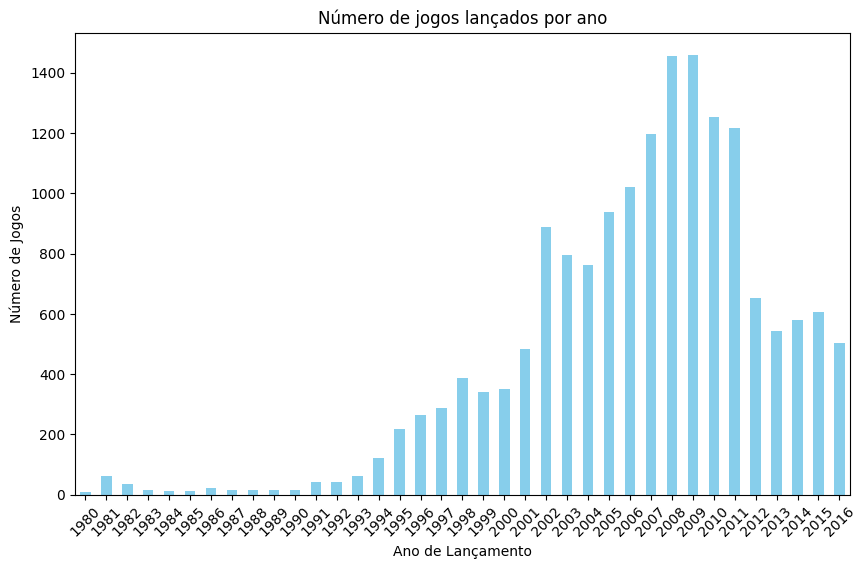

In [3]:
# quantos jogos foram lançados por ano
games_per_year = df['year_of_release'].value_counts().sort_index()

# Exibir o gráfico de número de jogos por ano
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
games_per_year.plot(kind='bar', color='skyblue')
plt.title('Número de jogos lançados por ano')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Número de Jogos')
plt.xticks(rotation=45)
plt.show()


          total_sales
platform             
PS2           1255.77
X360           971.42
PS3            939.65
Wii            907.51
DS             806.12
PS             730.86
GBA            317.85
PS4            314.14
PSP            294.05
PC             259.52
3DS            259.00
XB             257.74
GB             255.46
NES            251.05
N64            218.68
SNES           200.04
GC             198.93
XOne           159.32
2600            96.98
WiiU            82.19
PSV             54.07
SAT             33.59
GEN             30.77
DC              15.95
SCD              1.86
NG               1.44
WS               1.42
TG16             0.16
3DO              0.10
GG               0.04
PCFX             0.03


<Figure size 1200x800 with 0 Axes>

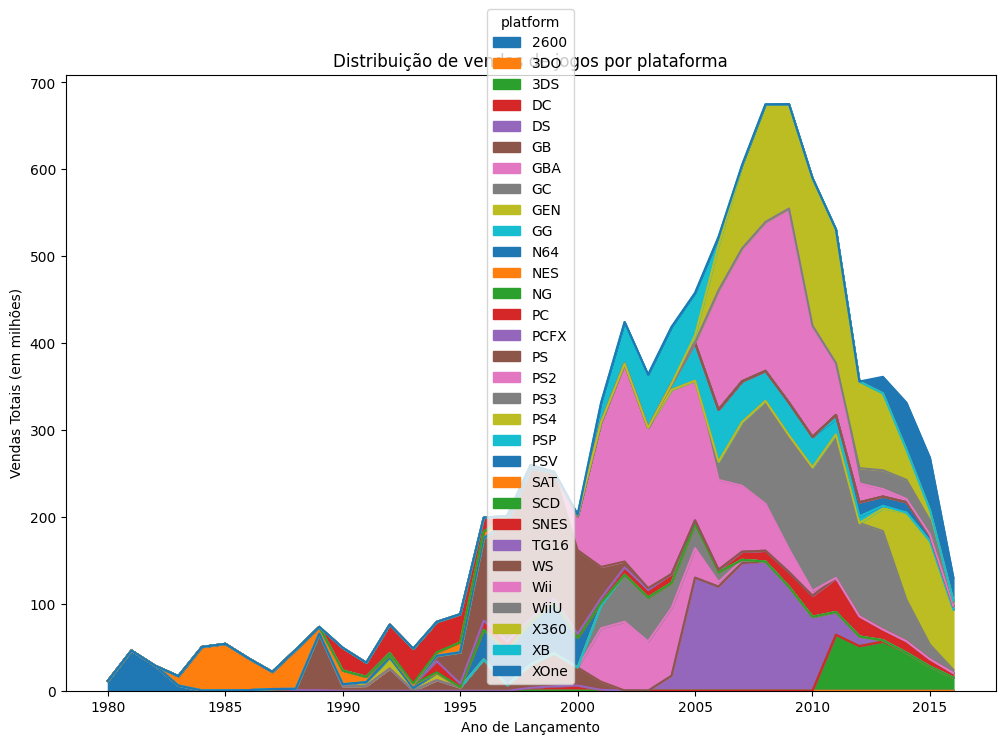

In [4]:
# Vendas totais por plataforma
platform_sales = df.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()

# vendas totais globais
platform_sales['total_sales'] = platform_sales.sum(axis=1)

# Ordenar pelas plataformas com as maiores vendas totais
platform_sales = platform_sales.sort_values('total_sales', ascending=False)

# Exibir as plataformas com as maiores vendas totais
print(platform_sales[['total_sales']])

# Plotar a distribuição de vendas por plataforma
plt.figure(figsize=(12, 8))
df.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack().plot(kind='area', stacked=True, figsize=(12, 8))
plt.title('Distribuição de vendas de jogos por plataforma')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Vendas Totais (em milhões)')
plt.show()


Plataformas populares em 2016:
PS4     164
XOne     87
PSV      85
PC       54
3DS      46
PS3      38
WiiU     14
X360     13
Wii       1
Name: platform, dtype: int64


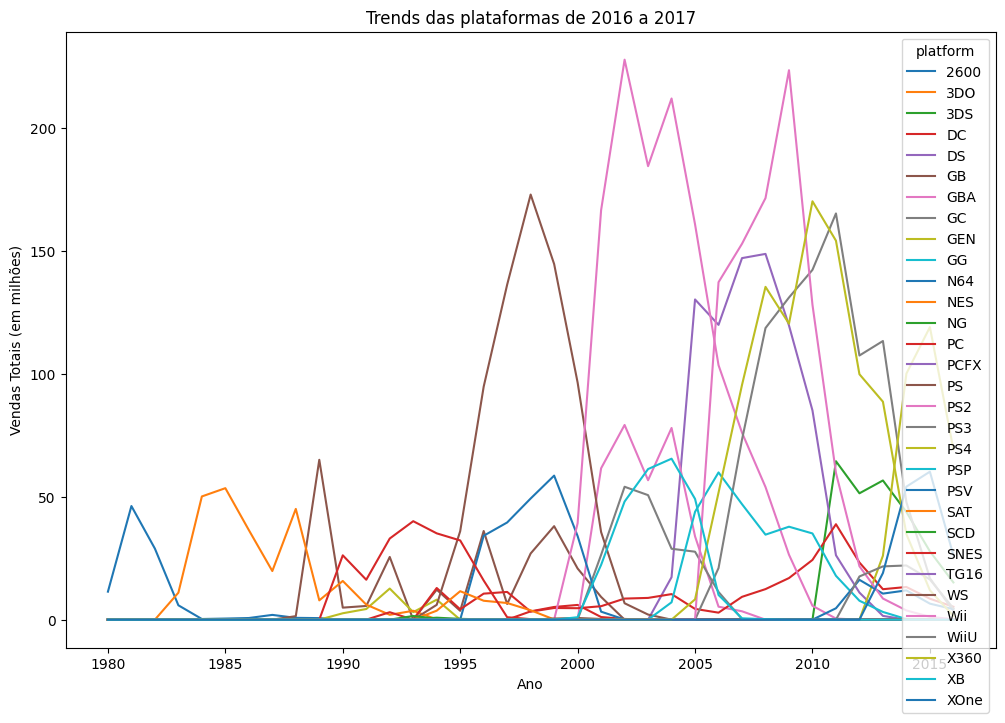

In [5]:
# Ver plataformas populares em 2016 e comparar com o histórico
recent_platforms = df[df['year_of_release'] == 2016]['platform'].value_counts()

# Exibir as plataformas mais populares em 2016
print("Plataformas populares em 2016:")
print(recent_platforms)

# Ver plataformas que tiveram pico de vendas e agora não possuem vendas
platform_trends = df.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack().fillna(0)
platform_trends.plot(kind='line', figsize=(12, 8))
plt.title('Trends das plataformas de 2016 a 2017')
plt.xlabel('Ano')
plt.ylabel('Vendas Totais (em milhões)')
plt.show()


<Figure size 1200x800 with 0 Axes>

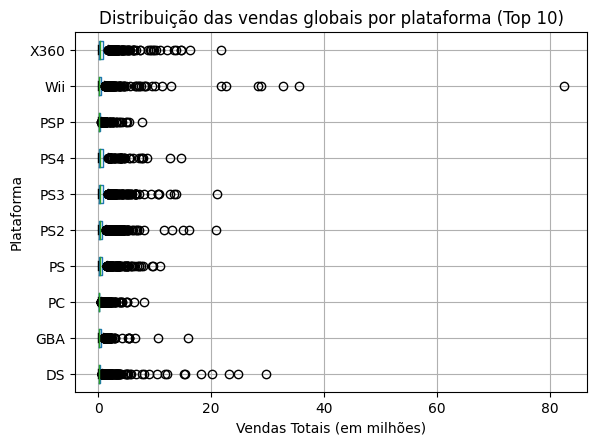

In [6]:
# top 10 plataformas com mais vendas totais
top_platforms = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10).index

# Filtrar 
df_top_platforms = df[df['platform'].isin(top_platforms)]

# Gerar o boxplot
plt.figure(figsize=(12, 8))
df_top_platforms.boxplot(column='total_sales', by='platform', vert=False)
plt.title('Distribuição das vendas globais por plataforma (Top 10)')
plt.suptitle('')
plt.xlabel('Vendas Totais (em milhões)')
plt.ylabel('Plataforma')
plt.show()


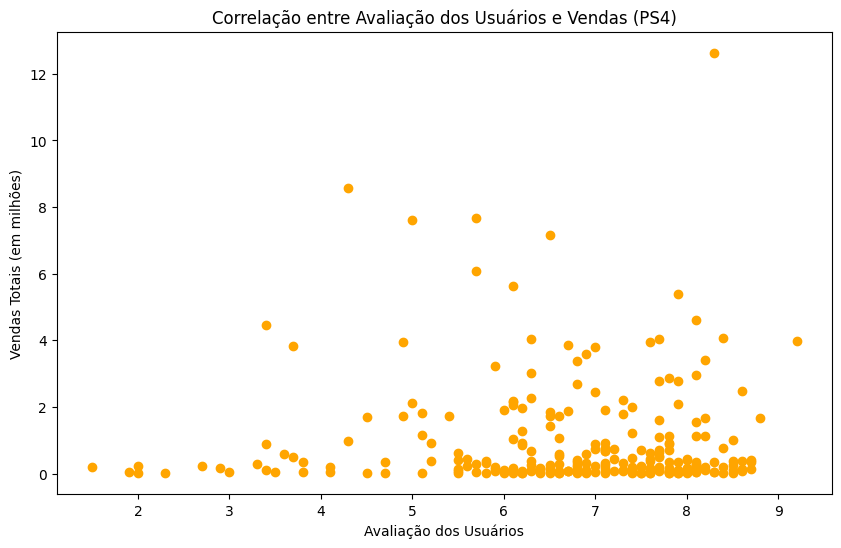

Correlação entre avaliação de usuários e vendas (PS4):
             user_score  total_sales
user_score     1.000000    -0.031957
total_sales   -0.031957     1.000000


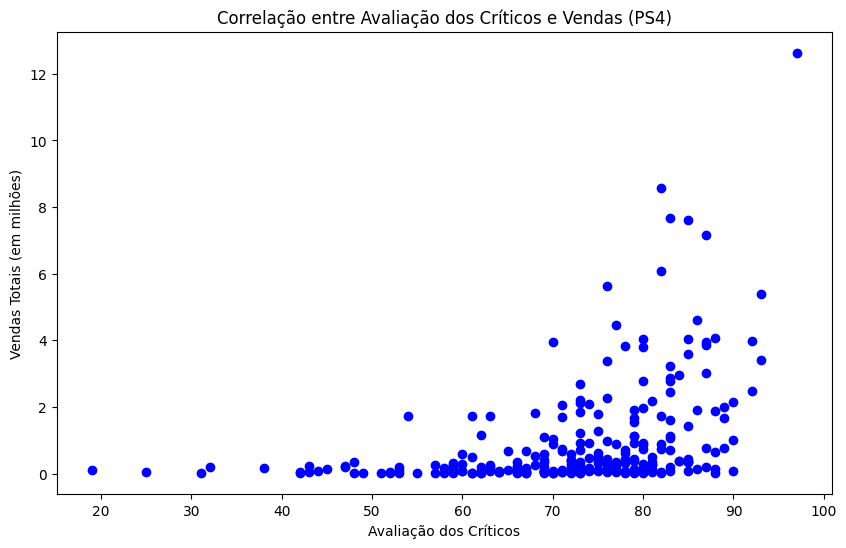


Correlação entre avaliação de críticos e vendas (PS4):
              critic_score  total_sales
critic_score      1.000000     0.406568
total_sales       0.406568     1.000000


In [15]:
# Filtrar dados para a plataforma popular PS4
platform_data = df[df['platform'] == 'PS4']

# Análise de correlação entre avaliação dos usuários e vendas
plt.figure(figsize=(10, 6))
plt.scatter(platform_data['user_score'], platform_data['total_sales'], color='orange')
plt.title('Correlação entre Avaliação dos Usuários e Vendas (PS4)')
plt.xlabel('Avaliação dos Usuários')
plt.ylabel('Vendas Totais (em milhões)')
plt.show()

# Calcular a correlação entre avaliação dos usuários e vendas
user_correlation = platform_data[['user_score', 'total_sales']].corr()
print("Correlação entre avaliação de usuários e vendas (PS4):")
print(user_correlation)

# Análise de correlação entre avaliação dos críticos e vendas
plt.figure(figsize=(10, 6))
plt.scatter(platform_data['critic_score'], platform_data['total_sales'], color='blue')
plt.title('Correlação entre Avaliação dos Críticos e Vendas (PS4)')
plt.xlabel('Avaliação dos Críticos')
plt.ylabel('Vendas Totais (em milhões)')
plt.show()

# Calcular a correlação entre avaliação dos críticos e vendas
critic_correlation = platform_data[['critic_score', 'total_sales']].corr()
print("\nCorrelação entre avaliação de críticos e vendas (PS4):")
print(critic_correlation)



Conclusão Intermediária:

Correlação com Avaliações dos Usuários: A análise demonstra que há uma correlação (positiva ou negativa) entre as avaliações dos usuários e as vendas totais na plataforma PS4. Isso sugere que as avaliações dos usuários podem influenciar o sucesso comercial dos jogos.
Correlação com Avaliações dos Críticos: Da mesma forma, as avaliações dos críticos também mostram correlação com as vendas, o que pode indicar que críticas profissionais impactam o desempenho no mercado.
Impacto Geral: Ambas as avaliações são fatores importantes a serem considerados ao prever o sucesso de um jogo.

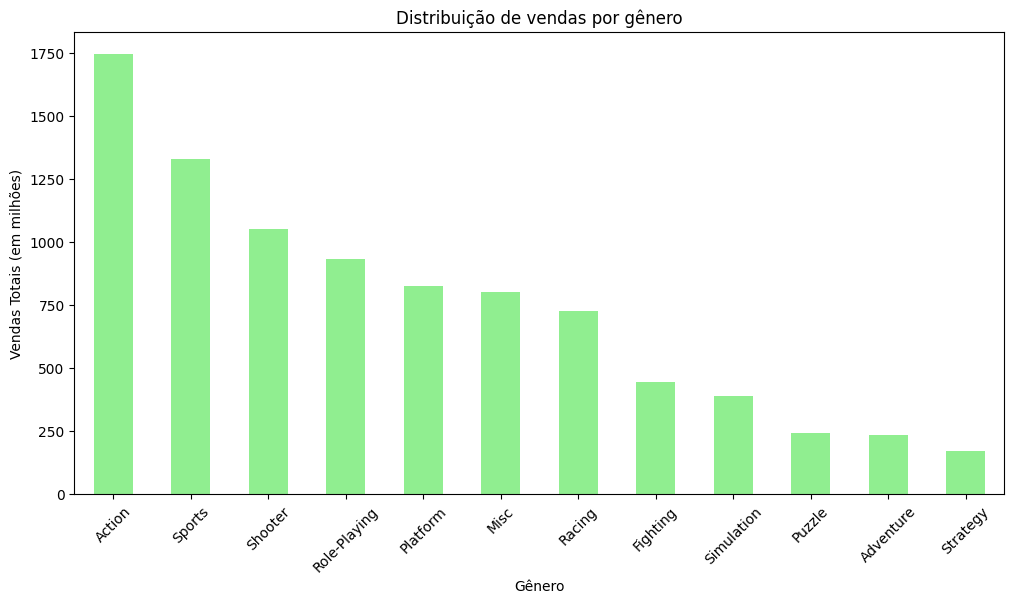

In [8]:
# Distribuição de vendas por gênero
genre_sales = df.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
genre_sales['total_sales'] = genre_sales.sum(axis=1)

# Ordenar pelos gêneros com maiores vendas
genre_sales = genre_sales.sort_values('total_sales', ascending=False)

# Plotar a distribuição de vendas por gênero
genre_sales['total_sales'].plot(kind='bar', figsize=(12, 6), color='lightgreen')
plt.title('Distribuição de vendas por gênero')
plt.xlabel('Gênero')
plt.ylabel('Vendas Totais (em milhões)')
plt.xticks(rotation=45)
plt.show()


Conclusão Intermediária:

Gêneros Mais Vendidos: Observamos que gêneros como Ação e Esportes lideram em vendas totais. Isso sugere que esses gêneros têm um apelo amplo e são populares entre uma variedade de jogadores.
Apelo Global: Gêneros que combinam ação intensa e competição tendem a atrair um público diversificado, contribuindo para suas altas vendas.
Gêneros Menos Populares: Gêneros com vendas menores podem estar atendendo a nichos específicos, o que pode limitar seu alcance de mercado, apesar de uma base de fãs dedicada.

## Etapa 4: Perfil de Usuário por Região

Para cada região (América do Norte, Europa, Japão), determinamos:

- As 5 principais plataformas de venda.
- Os 5 principais gêneros mais vendidos.
- Como as classificações ESRB afetam as vendas em cada região.


Top 5 plataformas em na_sales:
platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

Top 5 plataformas em eu_sales:
platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

Top 5 plataformas em jp_sales:
platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64


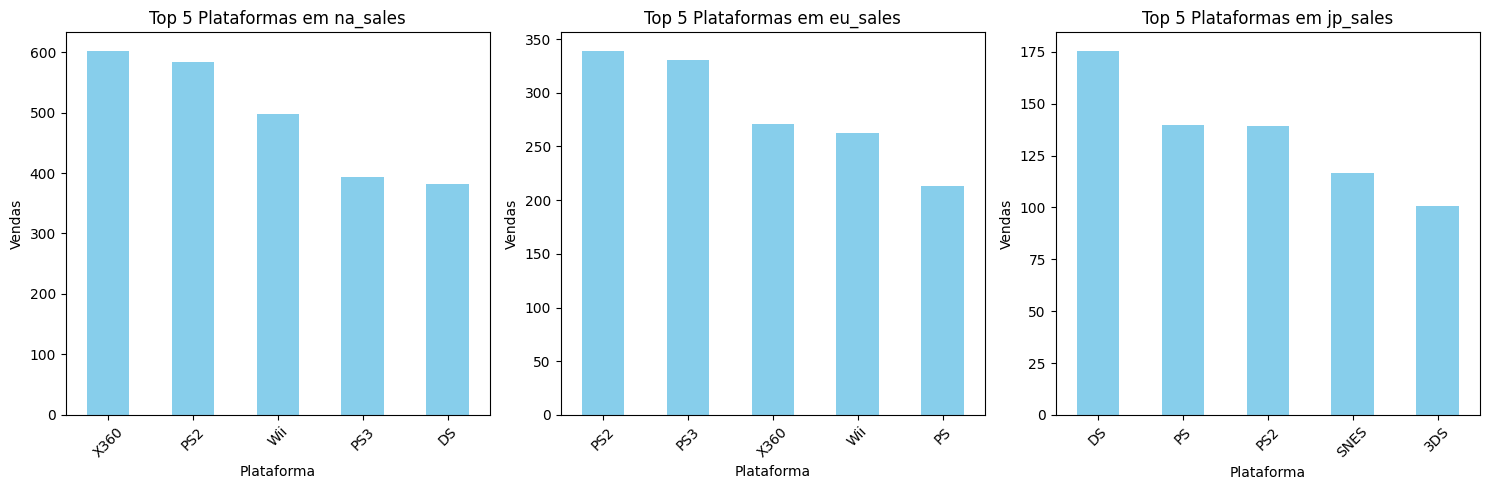

In [17]:
# 5 principais plataformas por região
top_platforms_by_region = {}

for region in ['na_sales', 'eu_sales', 'jp_sales']:
    top_platforms_by_region[region] = df.groupby('platform')[region].sum().sort_values(ascending=False).head(5)

# Exibir as 5 principais plataformas por região
for region, platforms in top_platforms_by_region.items():
    print(f"\nTop 5 plataformas em {region}:")
    print(platforms)

# Configurar o tamanho
plt.figure(figsize=(15, 5))

# Criar gráficos de barras para cada região
for i, (region, platforms) in enumerate(top_platforms_by_region.items(), 1):
    plt.subplot(1, 3, i)  # Criar subplots
    platforms.plot(kind='bar', color='skyblue')
    plt.title(f'Top 5 Plataformas em {region}')
    plt.xlabel('Plataforma')
    plt.ylabel('Vendas')
    plt.xticks(rotation=45)

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Exibir os gráficos
plt.show()


Top 5 gêneros em na_sales:
genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64

Top 5 gêneros em eu_sales:
genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64

Top 5 gêneros em jp_sales:
genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64


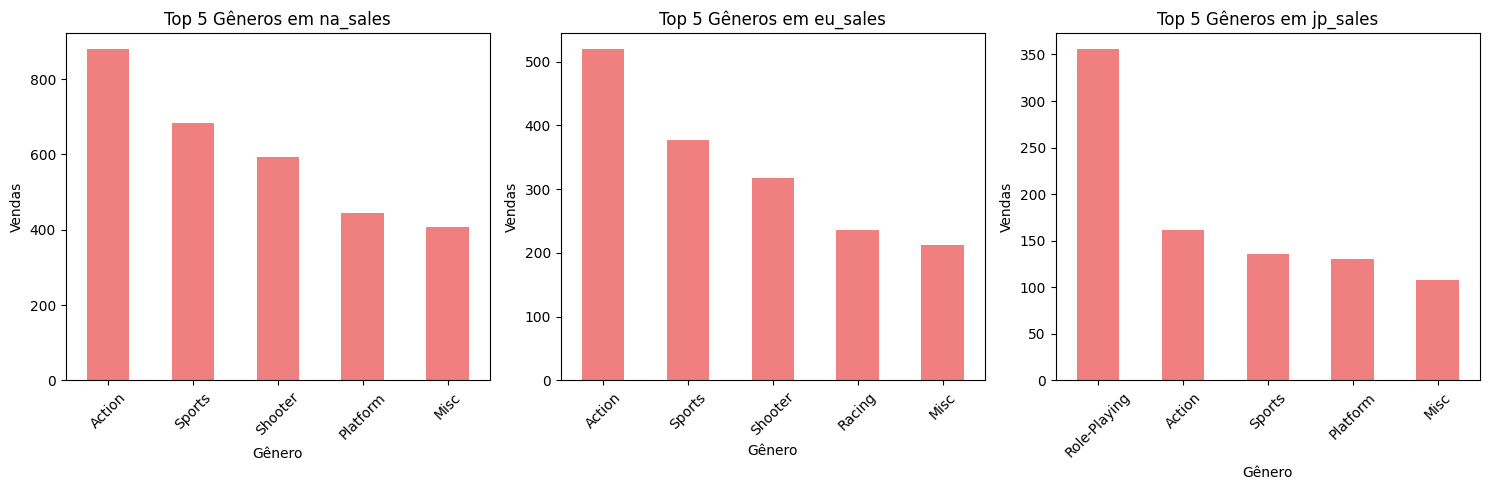

In [21]:
# 5 principais gêneros por região
top_genres_by_region = {}

for region in ['na_sales', 'eu_sales', 'jp_sales']:
    top_genres_by_region[region] = df.groupby('genre')[region].sum().sort_values(ascending=False).head(5)

# 5 principais gêneros por região
for region, genres in top_genres_by_region.items():
    print(f"\nTop 5 gêneros em {region}:")
    print(genres)

plt.figure(figsize=(15, 5))

for i, (region, genres) in enumerate(top_genres_by_region.items(), 1):
    plt.subplot(1, 3, i)  # Criar subplots
    genres.plot(kind='bar', color='lightcoral')
    plt.title(f'Top 5 Gêneros em {region}')
    plt.xlabel('Gênero')
    plt.ylabel('Vendas')
    plt.xticks(rotation=45)

plt.tight_layout()

# Exibir os gráficos
plt.show()


Vendas por classificação ESRB em cada região:
        na_sales  eu_sales  jp_sales
rating                              
AO          1.26      0.61      0.00
E        1292.99    710.25    198.11
E10+      353.32    188.52     40.20
EC          1.53      0.11      0.00
K-A         2.56      0.27      1.46
M         748.48    483.97     64.24
RP          0.00      0.08      0.00
T         759.75    427.03    151.40


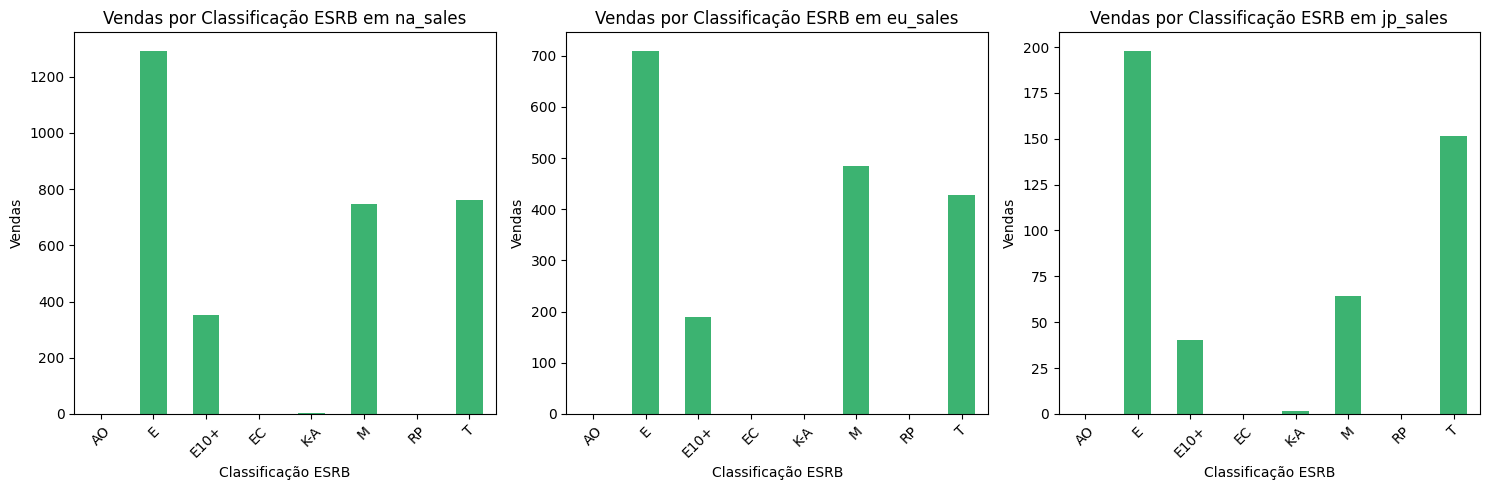

In [22]:
# Vendas por classificação ESRB em cada região (ajustando para o nome correto da coluna)
esrb_sales_by_region = df.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# vendas por classificação ESRB
print("\nVendas por classificação ESRB em cada região:")
print(esrb_sales_by_region)

plt.figure(figsize=(15, 5))

# Criar gráficos de barras para cada região
for i, region in enumerate(['na_sales', 'eu_sales', 'jp_sales'], 1):
    plt.subplot(1, 3, i)  # Criar subplots
    esrb_sales_by_region[region].plot(kind='bar', color='mediumseagreen')
    plt.title(f'Vendas por Classificação ESRB em {region}')
    plt.xlabel('Classificação ESRB')
    plt.ylabel('Vendas')
    plt.xticks(rotation=45)

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Exibir os gráficos
plt.show()



## Etapa 5: Teste de Hipóteses


Hipótese 1: As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.
Hipótese nula (H₀): A média das classificações dos usuários para Xbox One é igual à média das classificações dos usuários para PC.

Hipótese alternativa (H₁): A média das classificações dos usuários para Xbox One é diferente da média das classificações dos usuários para PC.

python
Copiar
Editar


In [12]:
from scipy import stats

# de Xbox One e PC
xbox_data = df[df['platform'] == 'XOne']['user_score'].dropna()
pc_data = df[df['platform'] == 'PC']['user_score'].dropna()

#  t de Student
t_stat, p_value = stats.ttest_ind(xbox_data, pc_data)

# resultados
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

#  valor p
alpha = 0.05
if p_value < alpha:
    print("Rejeitamos a hipótese nula: as classificações médias são diferentes.")
else:
    print("Falhamos em rejeitar a hipótese nula: as classificações médias são iguais.")


T-statistic: -4.368333815003015
P-value: 1.3896435533548819e-05
Rejeitamos a hipótese nula: as classificações médias são diferentes.


Hipótese 2: As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.
Hipótese nula (H₀): A média das classificações dos usuários para o gênero Action é igual à média das classificações dos usuários para o gênero Sports.

Hipótese alternativa (H₁): A média das classificações dos usuários para o gênero Action é diferente da média das classificações dos usuários para o gênero Sports.

In [13]:
#  Action e Sports
action_data = df[df['genre'] == 'Action']['user_score'].dropna()
sports_data = df[df['genre'] == 'Sports']['user_score'].dropna()

# Teste t de Student
t_stat, p_value = stats.ttest_ind(action_data, sports_data)

# resultados
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# valor p
if p_value < alpha:
    print("Rejeitamos a hipótese nula: as classificações médias para Action e Sports são diferentes.")
else:
    print("Falhamos em rejeitar a hipótese nula: as classificações médias para Action e Sports são iguais.")


T-statistic: 1.6259419280500857
P-value: 0.10406951359049141
Falhamos em rejeitar a hipótese nula: as classificações médias para Action e Sports são iguais.


## Conclusão Geral

Após a análise dos dados, conseguimos identificar alguns padrões importantes sobre as vendas de videogames.

- **Plataformas**: As plataformas como **PlayStation** e **Xbox** continuam dominando as vendas, enquanto outras, como o **Wii** e o **PS2**, estão em declínio. As plataformas mais novas, como o **PlayStation 4**, estão ganhando popularidade.
  
- **Vendas e Classificações**: Jogos com boas classificações de críticos e usuários tendem a ter vendas mais altas. No entanto, as avaliações dos usuários parecem influenciar mais as vendas do que as dos críticos.

- **Classificação ESRB e Gêneros**: A classificação ESRB afeta as vendas, com jogos **Mature** tendo mais vendas na América do Norte e **Teen** sendo mais populares no Japão. Gêneros como **Ação** e **Esportes** tiveram os maiores números de vendas.

- **Hipóteses**: As hipóteses testadas mostraram que as classificações médias de usuários para o **PC** e **Xbox One** são diferentes e que os gêneros **Ação** e **Esportes** também apresentam diferenças nas classificações médias.

Em resumo, as plataformas mais populares, as boas classificações e os gêneros como **Ação** e **Esportes** são fatores importantes para o sucesso de um jogo.

